### Creating sequence tables and plots/timelines for timber harvest activities completed in Boise National Forest 1967-2018.

#### Author: Katie Murenbeeld
#### Init_Date: Duplicated 5 Aug 2019 from BOISENF_TimberHarvest_Sequencing
#### Updated: 6 Aug 2019 - attempt to make PDFs for treatment sequence by size and time lag length

In [5]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import simpledbf 
from simpledbf import Dbf5 
from scipy.stats import norm

In [6]:
# Set the directories
raw_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/RAW/'
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'
output_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/OUTPUT/'

In [7]:
# Convert the most up to date timber harvest data from dbf to csv
#dbf = Dbf5(raw_data_dir + 'S_USA_Activity_TimberHarvest_july2019.dbf', codec='utf-8') # Import the dbf and assign the code 
#dbf.to_csv(mod_data_dir + 'USA_TH_JULY2019.csv') # Covert to csv

In [8]:
# Create dataframe from new csv
df = pd.read_csv(mod_data_dir + 'USA_TH_JULY2019.csv').reset_index()
df.head(1)

,index,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,SUID,...,DATA_SOU_1,ACCURACY,CRC_VALUE,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN
0,0,6,5,Lassen National Forest,506,Almanor Ranger District,51,50651,50651,050651T376000076000,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2018-01-09,25.759,0.000011,0.026648


In [9]:
# Create new data frame for just Boise National Forest
df2 = df.loc[df['ADMIN_FO_1']=='Boise National Forest'].copy().reset_index()
df2.head(5)

,level_0,index,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,...,DATA_SOU_1,ACCURACY,CRC_VALUE,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN
0,314,314,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-15,7.364,0.000003,0.008665
1,415,415,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-09,45.482,0.000021,0.025805
2,1848,1848,2,4,Boise National Forest,402,Lowman Ranger District,5,40205,40205,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2013-04-18,14.647,0.000007,0.020023
3,2618,2618,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-08,37.944,0.000017,0.024540
4,3565,3565,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-16,21.122,0.000010,0.030803


In [10]:
#Reduce columns for Boise National Forest dataframe
boi = df2[['ADMIN_FO_1','ADMIN_DIST','NEPA_DOC_N','ACTIVITY_2','ACTIVITY_N','NBR_UNITS_','NBR_UNITS1','DATE_PLANN','DATE_AWARD','DATE_COMPL']].copy().reset_index()
boi.head(5)

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN


In [11]:
# Group some of the activities together for later use. Use np.select(conditions, choices, default=). 
# Set your conditions to the ACTIVITY_2 codes, use isin() for when multiple codes will be grouped.

conditions = [
    (boi['ACTIVITY_2']==4177),
    (boi['ACTIVITY_2'].isin([4113,4111])),
    (boi['ACTIVITY_2']==4151),
    (boi['ACTIVITY_2']==4152),
    (boi['ACTIVITY_2'].isin([4121,4141,4145,4131,4148,4193,4194,4196,4132])),
    (boi['ACTIVITY_2'].isin([4231,4232,4210,4211])),
    (boi['ACTIVITY_2']==4143),
    (boi['ACTIVITY_2']==4220),
    (boi['ACTIVITY_2']==4242)
]
choices = ['A2_CLEARCUT','EA_CLEARCUT','UA_SINGLE','UA_GROUP','UA_SHELTER','INT_CUT','OVERSTORE_CUT','COMM_THIN','HARV_NOSTOCK']

In [12]:
# Use np.select() to create a new column with the coded/grouped activities.

boi['new_code'] = np.select(conditions, choices, default='none')
boi.head(5) # check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN,COMM_THIN
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15,COMM_THIN
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15,COMM_THIN
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN,INT_CUT


In [13]:
# Convert DATE_* columns to datetime. Add a new column for the serial dates
bnf_datearrP = boi['DATE_PLANN'].values
bnf_datearr_dtP = pd.to_datetime(bnf_datearrP)
boi['SerDatesPlan'] = bnf_datearr_dtP

bnf_datearrA = boi['DATE_AWARD'].values
bnf_datearr_dtA = pd.to_datetime(bnf_datearrA)
boi['SerDatesAward'] = bnf_datearr_dtA

bnf_datearrC = boi['DATE_COMPL'].values
bnf_datearr_dtC = pd.to_datetime(bnf_datearrC)
boi['SerDatesComp'] = bnf_datearr_dtC

In [14]:
boi.head(1) # Check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code,SerDatesPlan,SerDatesAward,SerDatesComp
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER,2009-09-30,2009-09-30,2013-08-13


In [15]:
# Here I will sort out the data so that only items planned to be completed before 2019 
# are included.

BOI2018 = boi.loc[boi['SerDatesPlan'] <= '2018-12-31'].copy()
BOI2018.head(10) # Check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code,SerDatesPlan,SerDatesAward,SerDatesComp
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER,2009-09-30,2009-09-30,2013-08-13
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN,COMM_THIN,2005-10-15,2005-10-15,NaT
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15,COMM_THIN,2012-05-04,2012-11-07,2013-08-15
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15,COMM_THIN,2009-07-15,2009-07-15,2009-07-15
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN,INT_CUT,2013-09-26,2013-09-26,NaT
5,5,Boise National Forest,Cascade Ranger District,DEFAULT FOR NOT REQUIRED,4151,Single-tree Selection Cut (UA/RH/FH),8.0,8.0,1999-06-15,1999-06-15,1999-06-15,UA_SINGLE,1999-06-15,1999-06-15,1999-06-15
6,6,Boise National Forest,Cascade Ranger District,DEFAULT FOR NOT REQUIRED,4113,Stand Clearcut (EA/RH/FH),40.0,40.0,1990-09-30,1990-09-30,1990-09-30,EA_CLEARCUT,1990-09-30,1990-09-30,1990-09-30
7,7,Boise National Forest,Mountain Home Ranger District,DEFAULT FOR NOT REQUIRED,4220,Commercial Thin,12.0,12.0,2000-09-15,2000-09-15,2000-09-15,COMM_THIN,2000-09-15,2000-09-15,2000-09-15
8,8,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,10.0,10.0,2013-09-26,2013-09-26,NaN,INT_CUT,2013-09-26,2013-09-26,NaT
9,9,Boise National Forest,Cascade Ranger District,DEFAULT FOR NOT REQUIRED,4231,"Salvage Cut (intermediate treatment, not regen...",4.0,4.0,1992-09-30,1992-09-30,1992-09-30,INT_CUT,1992-09-30,1992-09-30,1992-09-30


In [16]:
print(BOI2018['SerDatesPlan'].min(), BOI2018['SerDatesPlan'].max()) # Check the date range.

1967-06-01 00:00:00 2018-12-19 00:00:00


{'UA_SHELTER': (1.0, 1.0, 0.0),
 'COMM_THIN': (0.8, 0.0, 0.0),
 'INT_CUT': (0.6, 0.2, 1.0),
 'UA_SINGLE': (1.0, 0.6, 0.2),
 'EA_CLEARCUT': (0.0, 0.8, 0.4),
 'UA_GROUP': (0.0, 1.0, 1.0),
 'OVERSTORE_CUT': (0.8784313725490196, 0.8784313725490196, 0.8784313725490196),
 'HARV_NOSTOCK': (1.0, 0.6, 0.8)}

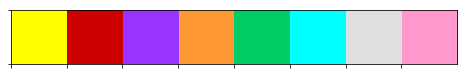

In [17]:
# I want to set the activity code (new_code) to a color_map for use when creating project sequence plots

# Set unique category labels
color_labels = BOI2018['new_code'].unique()
# List of RGB triplets
colors = [(1,1,0),(204/255,0,0),(153/255,51/255,255/255),(255/255,153/255,51/255),(0,204/255,102/255),(0,255/255,255/255),(224/255,224/255,224/255),(255/255,153/255,204/255)]
see_colors = sns.palplot(sns.color_palette(colors))
color_values = sns.color_palette(colors)
#values = sns.color_palette("colors",8)

# Map label to RGB
#color_map = dict(zip(color_labels, rgb_values))

#Map label to custom color palette
color_map = dict(zip(color_labels, color_values))

color_map # Check color_map

In [18]:
def project_seq_size(projname):
    
    proj = BOI2018.loc[BOI2018['NEPA_DOC_N']== (projname)].copy()
    proj = proj[['NEPA_DOC_N','new_code','SerDatesComp','NBR_UNITS1']].reset_index()
    proj = proj.groupby(['new_code','SerDatesComp'])['NBR_UNITS1'].sum().reset_index()
    proj = proj.sort_values(by=['SerDatesComp']).reset_index()
    proj['sequence_days'] = proj.SerDatesComp.diff()
    
    code_name = [None]
    for i in range(1,len(proj)):
        if proj.iloc[i,1]==proj.iloc[i-1,1] and proj.iloc[i,2]==proj.iloc[i-1,2]:
            code_name.append(proj.iloc[i,1] + " and " + proj.iloc[i-1,1] + " same day")
        elif proj.iloc[i,1]==proj.iloc[i-1,1] and proj.iloc[i,2]!=proj.iloc[i-1,2]:
            code_name.append(proj.iloc[i-1,1] + " to " + proj.iloc[i,1])
        elif proj.iloc[i,1]!=proj.iloc[i-1,1] and proj.iloc[i,2]==proj.iloc[i-1,2]:
            code_name.append(proj.iloc[i,1] + " and " + proj.iloc[i-1,1] + " same day")
        elif proj.iloc[i,1]!=proj.iloc[i-1,1] and proj.iloc[i,2]!=proj.iloc[i-1,2]:
            code_name.append(proj.iloc[i-1,1] + " to " + proj.iloc[i,1]) 
        
    proj['code_name']=code_name

    #proj1 = proj.groupby('code_name')['NBR_UNITS1'].agg(['sum','count']).reset_index()
    
    project_name_list = []

    for k in range(len(proj)):
        project_name_list.append(projname)
    
    proj['proj_name']=project_name_list
    
    return proj  

In [19]:
proj_list = BOI2018['NEPA_DOC_N'].unique()
#proj_list

In [20]:
DF = project_seq_size(proj_list[0])

for x in proj_list[1:]:
    DF = DF.append(project_seq_size(x))


In [21]:
DF

,index,new_code,SerDatesComp,NBR_UNITS1,sequence_days,code_name,proj_name
0,0.0,COMM_THIN,2011-08-15,509.0,NaT,None,(PALS)SIXSHOOTER PROJECT
1,6.0,UA_SHELTER,2011-08-15,24.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
2,1.0,COMM_THIN,2011-09-15,84.0,31 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT
3,7.0,UA_SHELTER,2011-09-15,63.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
4,2.0,COMM_THIN,2012-07-15,35.0,304 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT
5,3.0,COMM_THIN,2012-08-01,126.0,17 days,COMM_THIN to COMM_THIN,(PALS)SIXSHOOTER PROJECT
6,8.0,UA_SHELTER,2012-08-01,23.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
7,5.0,INT_CUT,2012-08-02,22.0,1 days,UA_SHELTER to INT_CUT,(PALS)SIXSHOOTER PROJECT
8,9.0,UA_SHELTER,2012-09-04,59.0,33 days,INT_CUT to UA_SHELTER,(PALS)SIXSHOOTER PROJECT
9,4.0,COMM_THIN,2012-09-13,278.0,9 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT


In [22]:
unique_sequence = DF['code_name'].unique()
unique_sequence.shape

(38,)

In [23]:
DF.groupby('code_name').describe()

index                              \
                                      count       mean        std   min   
code_name                                                                 
COMM_THIN and EA_CLEARCUT same day      1.0  10.000000        NaN  10.0   
COMM_THIN and OVERSTORE_CUT same day    1.0   0.000000        NaN   0.0   
COMM_THIN and UA_SHELTER same day       1.0   7.000000        NaN   7.0   
COMM_THIN to COMM_THIN                 32.0   3.593750   2.745781   1.0   
COMM_THIN to EA_CLEARCUT                1.0  27.000000        NaN  27.0   
COMM_THIN to INT_CUT                    1.0  36.000000        NaN  36.0   
COMM_THIN to UA_SHELTER                 3.0  50.666667   4.932883  45.0   
COMM_THIN to UA_SINGLE                  3.0  59.666667   1.527525  58.0   
EA_CLEARCUT and UA_SHELTER same day     4.0  23.500000   5.802298  16.0   
EA_CLEARCUT and UA_SINGLE same day      2.0  28.500000   0.707107  28.0   
EA_CLEARCUT to EA_CLEARCUT              8.0  19.750000   3.370036  15.0   
EA_CLEARCUT to OVERSTORE_CUT            1.0  40.000000        NaN  40.0   
EA_CLEARCUT to UA_SHELTER               2.0  47.500000   4.949747  44.0   
EA_CLEARCUT to UA_SINGLE                1.0  55.000000        NaN  55.0   
INT_CUT and COMM_THIN same day          5.0   4.200000   2.949576   1.0   
INT_CUT and EA_CLEARCUT same day        2.0   2.500000   0.707107   2.0   
INT_CUT to COMM_THIN                    3.0   0.666667   0.577350   0.0   
INT_CUT to EA_CLEARCUT                  1.0  24.000000        NaN  24.0   
INT_CUT to INT_CUT                     20.0  12.600000  15.527226   1.0   
INT_CUT to UA_SHELTER                   1.0   9.000000        NaN   9.0   
INT_CUT to UA_SINGLE                    1.0  57.000000        NaN  57.0   
OVERSTORE_CUT and INT_CUT same day      1.0   5.000000        NaN   5.0   
UA_GROUP and INT_CUT same day           3.0   2.333333   0.577350   2.0   
UA_GROUP to INT_CUT                     1.0   1.000000        NaN   1.0   
UA_SHELTER and COMM_THIN same day       6.0   6.666667   3.076795   1.0   
UA_SHELTER and EA_CLEARCUT same day     4.0  47.250000   4.272002  42.0   
UA_SHELTER and INT_CUT same day         6.0   6.666667   1.366260   5.0   
UA_SHELTER and OVERSTORE_CUT same day   1.0   9.000000        NaN   9.0   
UA_SHELTER to COMM_THIN                 9.0   4.444444   3.468109   1.0   
UA_SHELTER to EA_CLEARCUT               1.0   1.000000        NaN   1.0   
UA_SHELTER to INT_CUT                   5.0  15.400000  16.164777   2.0   
UA_SHELTER to UA_SHELTER                6.0  19.166667  20.721165   2.0   
UA_SINGLE and UA_SHELTER same day       2.0  33.500000  36.062446   8.0   
UA_SINGLE to COMM_THIN                  1.0  11.000000        NaN  11.0   
UA_SINGLE to INT_CUT                    1.0   3.000000        NaN   3.0   
UA_SINGLE to UA_SHELTER                 3.0  46.000000   4.582576  41.0   
UA_SINGLE to UA_SINGLE                  1.0  56.000000        NaN  56.0   

                                                                NBR_UNITS1  \
                                         25%   50%    75%   max      count   
code_name                                                                    
COMM_THIN and EA_CLEARCUT same day     10.00  10.0  10.00  10.0        1.0   
COMM_THIN and OVERSTORE_CUT same day    0.00   0.0   0.00   0.0        1.0   
COMM_THIN and UA_SHELTER same day       7.00   7.0   7.00   7.0        1.0   
COMM_THIN to COMM_THIN                  2.00   3.0   5.00  13.0       32.0   
COMM_THIN to EA_CLEARCUT               27.00  27.0  27.00  27.0        1.0   
COMM_THIN to INT_CUT                   36.00  36.0  36.00  36.0        1.0   
COMM_THIN to UA_SHELTER                49.00  53.0  53.50  54.0        3.0   
COMM_THIN to UA_SINGLE                 59.00  60.0  60.50  61.0        3.0   
EA_CLEARCUT and UA_SHELTER same day    21.25  24.0  26.25  30.0        4.0   
EA_CLEARCUT and UA_SINGLE same day     28.25  28.5  28.75  29.0        2.0   
EA_CLEARCUT to EA_CLEAR

In [24]:
DF_nodefault = DF.loc[DF['proj_name']!='DEFAULT FOR NOT REQUIRED'].copy().reset_index()
DF_nodefault

,level_0,index,new_code,SerDatesComp,NBR_UNITS1,sequence_days,code_name,proj_name
0,0,0.0,COMM_THIN,2011-08-15,509.0,NaT,None,(PALS)SIXSHOOTER PROJECT
1,1,6.0,UA_SHELTER,2011-08-15,24.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
2,2,1.0,COMM_THIN,2011-09-15,84.0,31 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT
3,3,7.0,UA_SHELTER,2011-09-15,63.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
4,4,2.0,COMM_THIN,2012-07-15,35.0,304 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT
5,5,3.0,COMM_THIN,2012-08-01,126.0,17 days,COMM_THIN to COMM_THIN,(PALS)SIXSHOOTER PROJECT
6,6,8.0,UA_SHELTER,2012-08-01,23.0,0 days,UA_SHELTER and COMM_THIN same day,(PALS)SIXSHOOTER PROJECT
7,7,5.0,INT_CUT,2012-08-02,22.0,1 days,UA_SHELTER to INT_CUT,(PALS)SIXSHOOTER PROJECT
8,8,9.0,UA_SHELTER,2012-09-04,59.0,33 days,INT_CUT to UA_SHELTER,(PALS)SIXSHOOTER PROJECT
9,9,4.0,COMM_THIN,2012-09-13,278.0,9 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT


Need to figure out how to better deal with the sequence names for treatments that occur on the same day and follow treatments that occurred on the same day (see the first 6 rows above ^^).

In [25]:
DF_nodefault.groupby('code_name').describe()

level_0                                 \
                                        count      mean       std  min   25%   
code_name                                                                      
COMM_THIN to COMM_THIN                   26.0  3.615385  2.401282  1.0  2.00   
INT_CUT and COMM_THIN same day            5.0  2.200000  2.167948  1.0  1.00   
INT_CUT and EA_CLEARCUT same day          2.0  2.500000  2.121320  1.0  1.75   
INT_CUT to COMM_THIN                      3.0  2.333333  1.527525  1.0  1.50   
INT_CUT to INT_CUT                       14.0  2.714286  1.815683  1.0  1.00   
INT_CUT to UA_SHELTER                     1.0  8.000000       NaN  8.0  8.00   
OVERSTORE_CUT and INT_CUT same day        1.0  8.000000       NaN  8.0  8.00   
UA_GROUP and INT_CUT same day             3.0  2.000000  1.000000  1.0  1.50   
UA_GROUP to INT_CUT                       1.0  2.000000       NaN  2.0  2.00   
UA_SHELTER and COMM_THIN same day         6.0  4.166667  3.430258  1.0  1.50   
UA_SHELTER and INT_CUT same day           6.0  4.666667  2.503331  2.0  2.50   
UA_SHELTER and OVERSTORE_CUT same day     1.0  9.000000       NaN  9.0  9.00   
UA_SHELTER to COMM_THIN                   5.0  5.600000  2.880972  2.0  4.00   
UA_SHELTER to EA_CLEARCUT                 1.0  3.000000       NaN  3.0  3.00   
UA_SHELTER to INT_CUT                     3.0  5.666667  2.309401  3.0  5.00   
UA_SHELTER to UA_SHELTER                  4.0  5.500000  4.041452  2.0  2.75   
UA_SINGLE and UA_SHELTER same day         1.0  5.000000       NaN  5.0  5.00   
UA_SINGLE to INT_CUT                      1.0  6.000000       NaN  6.0  6.00   

                                                       index            ...  \
                                       50%   75%   max count      mean  ...   
code_name                                                               ...   
COMM_THIN to COMM_THIN                 3.0  5.00   9.0  26.0  3.000000  ...   
INT_CUT and COMM_THIN same day         1.0  2.00   6.0   5.0  4.200000  ...   
INT_CUT and EA_CLEARCUT same day       2.5  3.25   4.0   2.0  2.500000  ...   
INT_CUT to COMM_THIN                   2.0  3.00   4.0   3.0  0.666667  ...   
INT_CUT to INT_CUT                     2.5  3.75   7.0  14.0  2.785714  ...   
INT_CUT to UA_SHELTER                  8.0  8.00   8.0   1.0  9.000000  ...   
OVERSTORE_CUT and INT_CUT same day     8.0  8.00   8.0   1.0  5.000000  ...   
UA_GROUP and INT_CUT same day          2.0  2.50   3.0   3.0  2.333333  ...   
UA_GROUP to INT_CUT                    2.0  2.00   2.0   1.0  1.000000  ...   
UA_SHELTER and COMM_THIN same day      3.5  5.50  10.0   6.0  6.666667  ...   
UA_SHELTER and INT_CUT same day        4.5  6.50   8.0   6.0  6.666667  ...   
UA_SHELTER and OVERSTORE_CUT same day  9.0  9.00   9.0   1.0  9.000000  ...   
UA_SHELTER to COMM_THIN                5.0  8.00   9.0   5.0  2.800000  ...   
UA_SHELTER to EA_CLEARCUT              3.0  3.00   3.0   1.0  1.000000  ...   
UA_SHELTER to INT_CUT                  7.0  7.00   7.0   3.0  3.666667  ...   
UA_SHELTER to UA_SHELTER               4.5  7.25  11.0   4.0  6.000000  ...   
UA_SINGLE and UA_SHELTER same day      5.0  5.00   5.0   1.0  8.000000  ...   
UA_SINGLE to INT_CUT                   6.0  6.00   6.0   1.0  3.000000  ...   

                                      NBR_UNITS1         sequence_days  \
                                             75%     max         count   
code_name                                                                
COMM_THIN to COMM_THIN                    224.25  1203.0            26   
INT_CUT and COMM_THIN same day            120.00   189.0             5   
INT_CUT and EA_CLEARCUT same day          305.25   396.0             2   
INT_CUT to COMM_THIN                      205.00   231.0             3   
INT_CUT to INT_CUT                         42.55   187.0            14   
INT_CUT to UA_SHELTER                      59.00    59.0             1   
OVERSTORE_CUT and INT_CUT same 

6 Aug 2019: So I think I want to make PDFs for each sequence for size and time lag...

In [26]:
test_hist_area = DF.loc[DF['code_name']=='COMM_THIN to COMM_THIN']['NBR_UNITS1'].values
DF_nona = DF.dropna(subset=['sequence_days']).copy() 
test_hist_time = DF_nona.loc[DF_nona['code_name']=='COMM_THIN to COMM_THIN']['sequence_days'].dt.days.values

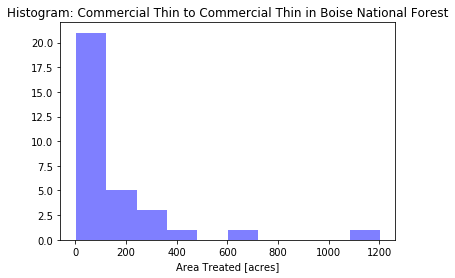

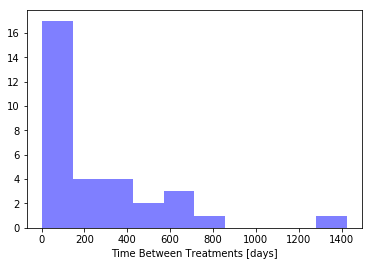

In [27]:
num_bins = 10 #set as afunction of the total count

n, bins, patches = plt.hist(test_hist_area, num_bins, facecolor='blue', alpha=0.5)
plt.title('Histogram: Commercial Thin to Commercial Thin in Boise National Forest')
plt.xlabel('Area Treated [acres]')
plt.show()

n, bins, patches = plt.hist(test_hist_time, num_bins,facecolor='blue', alpha=0.5) 
plt.xlabel('Time Between Treatments [days]')
plt.show()

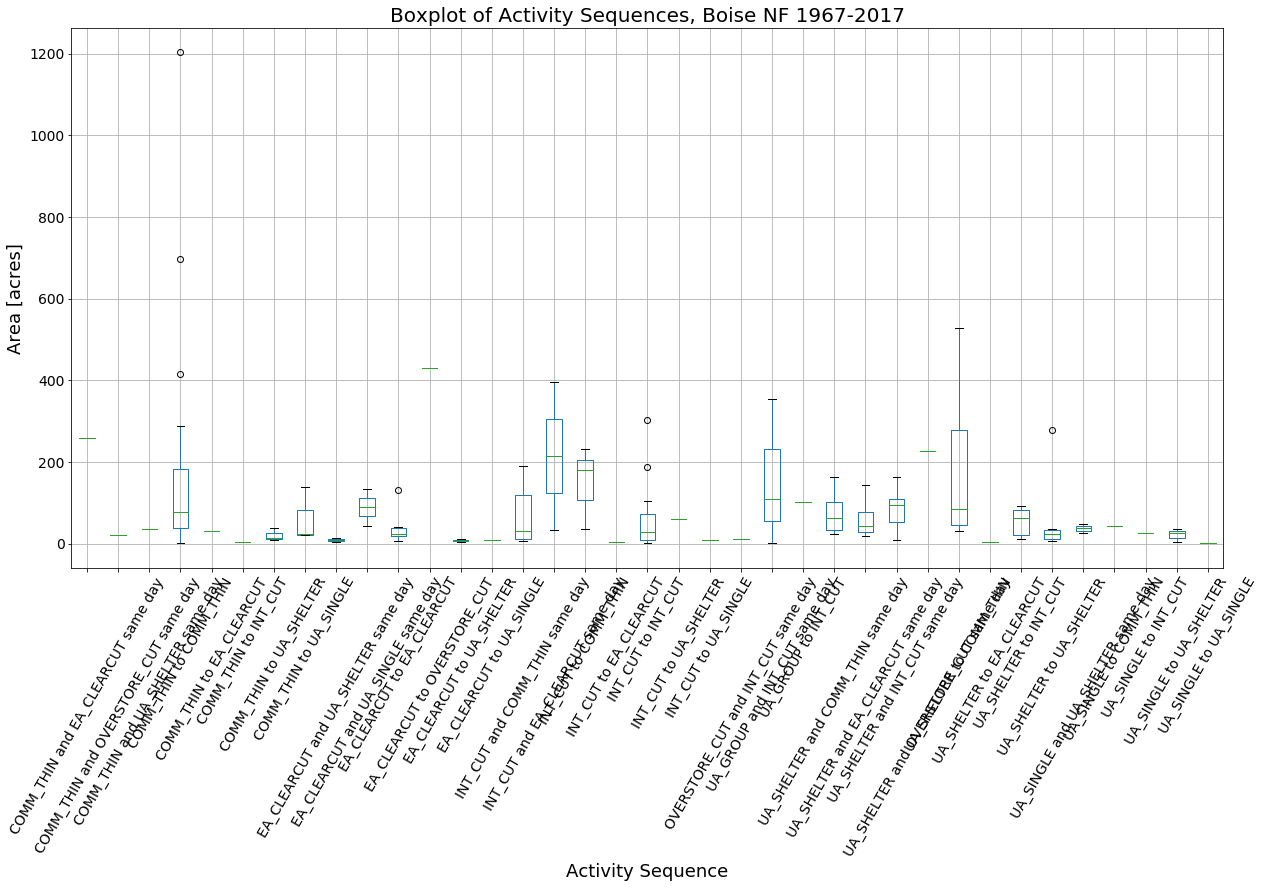

In [28]:
DF_nona.boxplot(column='NBR_UNITS1', by='code_name', figsize=(20,10))
plt.xlabel('Activity Sequence', fontsize=18)
plt.xticks(rotation=60, fontsize=14)
plt.ylabel('Area [acres]', fontsize=18)
plt.yticks(fontsize=14)
plt.title('Boxplot of Activity Sequences, Boise NF 1967-2017', fontsize=20)
plt.suptitle("")
plt.show()

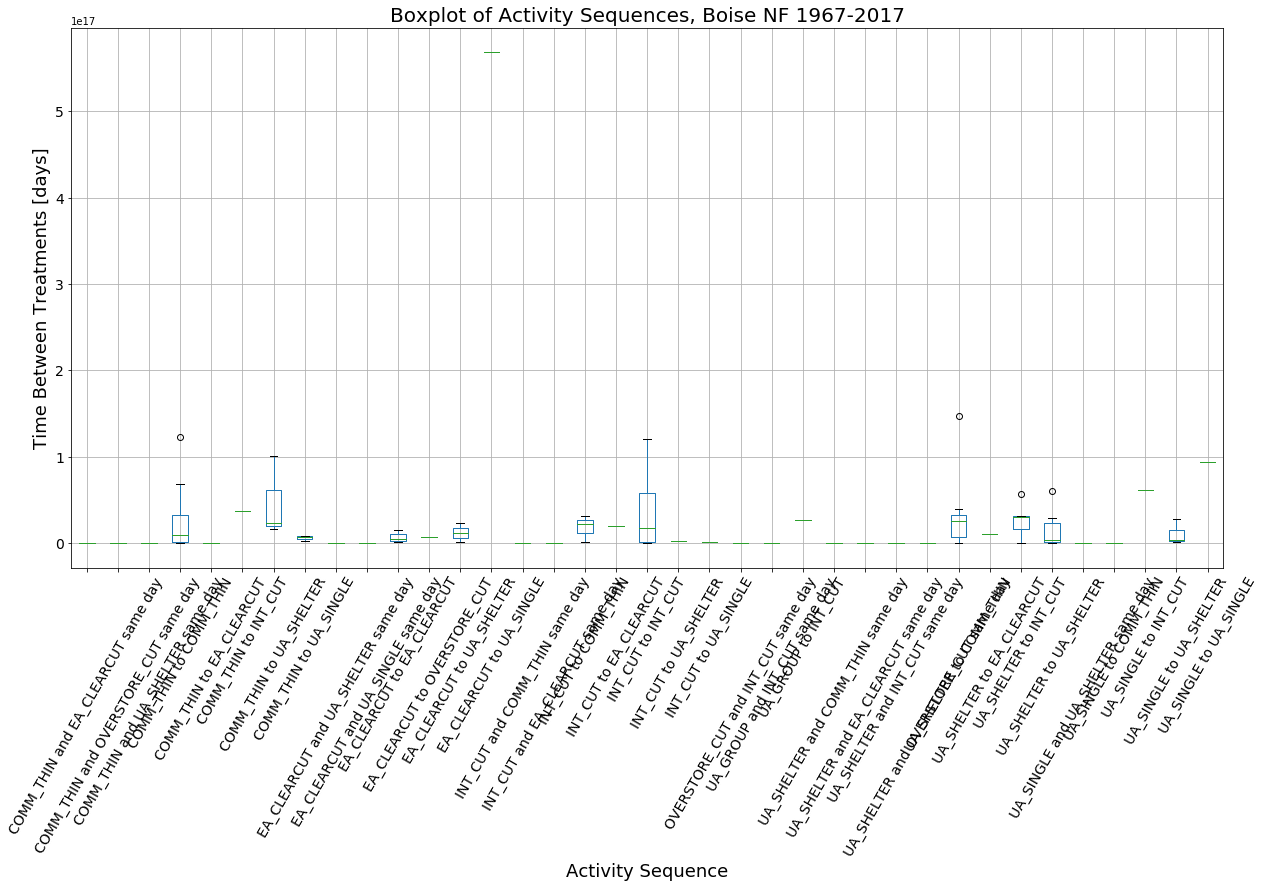

In [29]:
DF_nona.boxplot(column='sequence_days', by='code_name', figsize=(20,10))
plt.xlabel('Activity Sequence', fontsize=18)
plt.xticks(rotation=60, fontsize=14)
plt.ylabel('Time Between Treatments [days]', fontsize=18)
plt.yticks(fontsize=14)
plt.title('Boxplot of Activity Sequences, Boise NF 1967-2017', fontsize=20)
plt.suptitle("")
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()


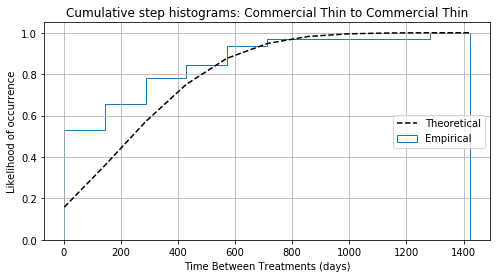

In [30]:
from matplotlib import mlab

#np.random.seed(0)

mu = test_hist_time.mean()
sigma = test_hist_time.std()
n_bins = 10 # set as a function of count

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(test_hist_time, n_bins, density=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(test_hist_time, bins=bins, density=1, histtype='step', cumulative=-1,
#        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms: Commercial Thin to Commercial Thin')
ax.set_xlabel('Time Between Treatments (days)')
ax.set_ylabel('Likelihood of occurrence')
plt.savefig(output_data_dir + 'test_CDF.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


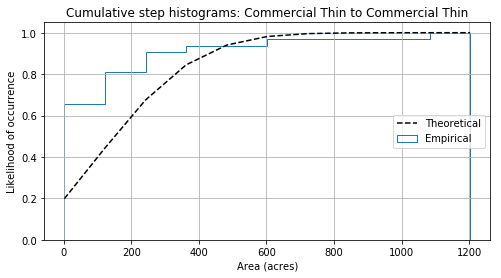

In [31]:
mu = test_hist_area.mean()
sigma = test_hist_area.std()
n_bins = 10

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(test_hist_area, n_bins, density=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(test_hist_time, bins=bins, density=1, histtype='step', cumulative=-1,
#        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms: Commercial Thin to Commercial Thin')
ax.set_xlabel('Area (acres)')
ax.set_ylabel('Likelihood of occurrence')
plt.savefig(output_data_dir + 'test_CDF_2.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.show()

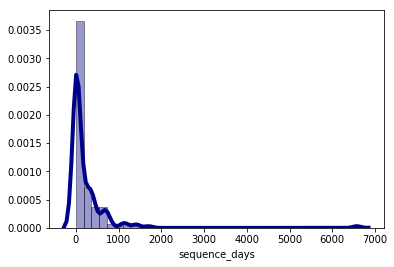

In [37]:
# Density Plot and Histogram of all arrival delays
sns.distplot(DF_nona['sequence_days'].dt.days, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [39]:
DF_nozerodays = DF_nona.loc[DF_nona['sequence_days'].dt.days != 0].copy().reset_index()

In [53]:
DF_nozerodays['time_act'] = DF_nozerodays['sequence_days'].dt.days

In [62]:
DF_nozerodays['time_act'].fillna(0, inplace=True)
DF_nozerodays

,level_0,index,new_code,SerDatesComp,NBR_UNITS1,sequence_days,code_name,proj_name,time_act
0,0,0.0,COMM_THIN,2011-08-15,509.0,NaT,None,(PALS)SIXSHOOTER PROJECT,0.0
1,2,1.0,COMM_THIN,2011-09-15,84.0,31 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT,31.0
2,4,2.0,COMM_THIN,2012-07-15,35.0,304 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT,304.0
3,5,3.0,COMM_THIN,2012-08-01,126.0,17 days,COMM_THIN to COMM_THIN,(PALS)SIXSHOOTER PROJECT,17.0
4,7,5.0,INT_CUT,2012-08-02,22.0,1 days,UA_SHELTER to INT_CUT,(PALS)SIXSHOOTER PROJECT,1.0
5,8,9.0,UA_SHELTER,2012-09-04,59.0,33 days,INT_CUT to UA_SHELTER,(PALS)SIXSHOOTER PROJECT,33.0
6,9,4.0,COMM_THIN,2012-09-13,278.0,9 days,UA_SHELTER to COMM_THIN,(PALS)SIXSHOOTER PROJECT,9.0
7,11,11.0,UA_SHELTER,2013-08-13,7.0,334 days,UA_SHELTER to UA_SHELTER,(PALS)SIXSHOOTER PROJECT,334.0
8,0,0.0,COMM_THIN,2005-10-15,39.0,NaT,None,NORTH KENNEDY-COTTONWOOD TS,0.0
9,2,1.0,COMM_THIN,2006-10-15,35.0,365 days,INT_CUT to COMM_THIN,NORTH KENNEDY-COTTONWOOD TS,365.0


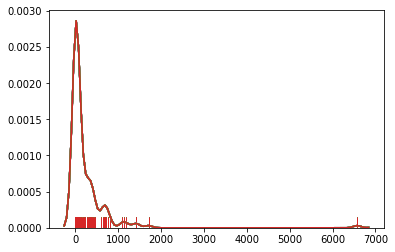

In [66]:
unique_vals = DF_nozerodays['code_name'].unique()  # [0, 1, 2]

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [DF_nozerodays.loc[DF_nozerodays['code_name'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(DF_nozerodays[['time_act']], hist=False, rug=True)

plt.show()

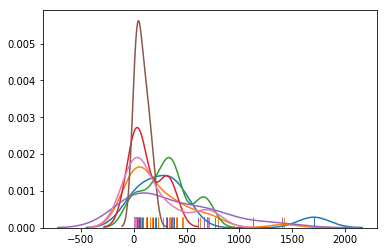

In [85]:
data = DF_nozerodays

sns.distplot(data.loc[data['code_name']=='UA_SHELTER to COMM_THIN'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='COMM_THIN to COMM_THIN'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='UA_SHELTER to INT_CUT'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='UA_SINGLE to UA_SHELTER'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='INT_CUT to INT_CUT'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='EA_CLEARCUT to EA_CLEARCUT'][['time_act']], hist=False, rug=True)
sns.distplot(data.loc[data['code_name']=='UA_SHELTER to UA_SHELTER'][['time_act']], hist=False, rug=True)




In [79]:
unique_vals

array([None, 'UA_SHELTER to COMM_THIN', 'COMM_THIN to COMM_THIN',
       'UA_SHELTER to INT_CUT', 'INT_CUT to UA_SHELTER',
       'UA_SHELTER to UA_SHELTER', 'INT_CUT to COMM_THIN',
       'INT_CUT to INT_CUT', 'EA_CLEARCUT to EA_CLEARCUT',
       'EA_CLEARCUT to UA_SINGLE', 'UA_SINGLE to UA_SINGLE',
       'UA_SINGLE to UA_SHELTER', 'EA_CLEARCUT to UA_SHELTER',
       'INT_CUT to EA_CLEARCUT', 'EA_CLEARCUT to OVERSTORE_CUT',
       'COMM_THIN to UA_SHELTER', 'INT_CUT to UA_SINGLE',
       'COMM_THIN to EA_CLEARCUT', 'COMM_THIN to UA_SINGLE',
       'UA_SINGLE to COMM_THIN', 'COMM_THIN to INT_CUT',
       'UA_GROUP to INT_CUT', 'UA_SHELTER to EA_CLEARCUT',
       'UA_SINGLE to INT_CUT'], dtype=object)

In [83]:
data.groupby('code_name').describe()

level_0                                           \
                               count       mean        std   min    25%   50%   
code_name                                                                       
COMM_THIN to COMM_THIN          32.0  10.343750  15.177678   1.0   2.00   4.0   
COMM_THIN to EA_CLEARCUT         1.0  34.000000        NaN  34.0  34.00  34.0   
COMM_THIN to INT_CUT             1.0  58.000000        NaN  58.0  58.00  58.0   
COMM_THIN to UA_SHELTER          3.0  43.000000  16.643317  24.0  37.00  50.0   
COMM_THIN to UA_SINGLE           3.0  45.666667   7.023769  39.0  42.00  45.0   
EA_CLEARCUT to EA_CLEARCUT       8.0   9.750000   7.245688   1.0   6.75   8.5   
EA_CLEARCUT to OVERSTORE_CUT     1.0  21.000000        NaN  21.0  21.00  21.0   
EA_CLEARCUT to UA_SHELTER        2.0  29.000000  19.798990  15.0  22.00  29.0   
EA_CLEARCUT to UA_SINGLE         1.0   2.000000        NaN   2.0   2.00   2.0   
INT_CUT to COMM_THIN             3.0   2.333333   1.527525   1.0   1.50   2.0   
INT_CUT to EA_CLEARCUT           1.0  20.000000        NaN  20.0  20.00  20.0   
INT_CUT to INT_CUT              20.0  13.600000  20.803340   1.0   1.75   3.5   
INT_CUT to UA_SHELTER            1.0   8.000000        NaN   8.0   8.00   8.0   
INT_CUT to UA_SINGLE             1.0  29.000000        NaN  29.0  29.00  29.0   
UA_GROUP to INT_CUT              1.0   2.000000        NaN   2.0   2.00   2.0   
UA_SHELTER to COMM_THIN          9.0  22.222222  20.933094   2.0   5.00   9.0   
UA_SHELTER to EA_CLEARCUT        1.0   3.000000        NaN   3.0   3.00   3.0   
UA_SHELTER to INT_CUT            5.0  12.200000  10.034939   3.0   7.00   7.0   
UA_SHELTER to UA_SHELTER         6.0  11.000000  10.714476   2.0   3.75   8.5   
UA_SINGLE to COMM_THIN           1.0  54.000000        NaN  54.0  54.00  54.0   
UA_SINGLE to INT_CUT             1.0   6.000000        NaN   6.0   6.00   6.0   
UA_SINGLE to UA_SHELTER          3.0  24.666667  18.583146   4.0  17.00  30.0   
UA_SINGLE to UA_SINGLE           1.0   3.000000        NaN   3.0   3.00   3.0   

                                          index             ...  \
                                75%   max count       mean  ...   
code_name                                                   ...   
COMM_THIN to COMM_THIN         7.25  57.0  32.0   3.593750  ...   
COMM_THIN to EA_CLEARCUT      34.00  34.0   1.0  27.000000  ...   
COMM_THIN to INT_CUT          58.00  58.0   1.0  36.000000  ...   
COMM_THIN to UA_SHELTER       52.50  55.0   3.0  50.666667  ...   
COMM_THIN to UA_SINGLE        49.00  53.0   3.0  59.666667  ...   
EA_CLEARCUT to EA_CLEARCUT    10.25  26.0   8.0  19.750000  ...   
EA_CLEARCUT to OVERSTORE_CUT  21.00  21.0   1.0  40.000000  ...   
EA_CLEARCUT to UA_SHELTER     36.00  43.0   2.0  47.500000  ...   
EA_CLEARCUT to UA_SINGLE       2.00   2.0   1.0  55.000000  ...   
INT_CUT to COMM_THIN           3.00   4.0   3.0   0.666667  ...   
INT_CUT to EA_CLEARCUT        20.00  20.0   1.0  24.000000  ...   
INT_CUT to INT_CUT            17.25  61.0  20.0  12.600000  ...   
INT_CUT to UA_SHELTER          8.00   8.0   1.0   9.000000  ...   
INT_CUT to UA_SINGLE          29.00  29.0   1.0  57.000000  ...   
UA_GROUP to INT_CUT            2.00   2.0   1.0   1.000000  ...   
UA_SHELTER to COMM_THIN       36.00  56.0   9.0   4.444444  ...   
UA_SHELTER to EA_CLEARCUT      3.00   3.0   1.0   1.000000  ...   
UA_SHELTER to INT_CUT         16.00  28.0   5.0  15.400000  ...   
UA_SHELTER to UA_SHELTER      12.50  31.0   6.0  19.166667  ...   
UA_SINGLE to COMM_THIN        54.00  54.0   1.0  11.000000  ...   
UA_SINGLE to INT_CUT           6.00   6.0   1.0   3.000000  ...   
UA_SINGLE to UA_SHELTER       35.00  40.0   3.0  46.000000  ...   
UA_SINGLE to UA_SINGLE         3.00   3.0   1.0  56.000000  ...   

                                   sequence_days                     time_act  \
                                             75%                 max    count   
code_name        